In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import numpy as np
import os
from config import Configuration
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def load_image(path, shape, flags, convert_color=True):
    # cv2 load images as BGR, convert it to RGB
    print("Loading image %s" % path)
    img = cv2.imread(path, flags=flags)
    if shape:
        # Resize
        border_v = 0
        border_h = 0
        if (shape[0]/shape[1]) >= (img.shape[0]/img.shape[1]):
            border_v = int((((shape[0]/shape[1])*img.shape[1])-img.shape[0])/2)
        else:
            border_h = int((((shape[0]/shape[1])*img.shape[0])-img.shape[1])/2)
        img = cv2.copyMakeBorder(img, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
        img = cv2.resize(img, (shape[0], shape[1]))

    if convert_color:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    img = img.astype(np.float32)
    return img

def revertImageShape(prediction, original_image):
    if prediction.shape[0] / prediction.shape[1] == original_image.shape[0] / original_image.shape[1]:
        return cv2.resize(prediction, (original_image.shape[1],original_image.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    # Landscape image, since opencv shape is backwards
    if original_image.shape[1] > original_image.shape[0]:
        offset_y = (prediction.shape[0] - (original_image.shape[0] * prediction.shape[1]/original_image.shape[1])) / 2
        height = prediction.shape[0] - (offset_y * 2)
        prediction = prediction[int(offset_y):int(offset_y + height), :]
        return cv2.resize(prediction, (original_image.shape[1],original_image.shape[0]), interpolation=cv2.INTER_NEAREST)
    else:
        offset_x = (prediction.shape[1] - (original_image.shape[1] * prediction.shape[0]/original_image.shape[0])) / 2
        width = prediction.shape[1] - (offset_x * 2)
        prediction = prediction[:, int(offset_x):int(offset_x + width)]
        return cv2.resize(prediction, (original_image.shape[1],original_image.shape[0]), interpolation=cv2.INTER_NEAREST)
        


def convert_images():
    if not os.path.exists(Configuration.EVAL_DATASET_DIR):
        os.makedirs(os.path.join(Configuration.EVAL_DATASET_DIR, "images/"))

    if not os.path.exists(Configuration.EVAL_IMAGES_DIR):
        print("FAIL: Make sure this path exists: %s!" % Configuration.EVAL_IMAGES_DIR)
        raise

    tuples = [(f, join(Configuration.EVAL_IMAGES_DIR, f)) for f in listdir(Configuration.EVAL_IMAGES_DIR) if not isfile(join(Configuration.EVAL_IMAGES_DIR, f))]
    tuples.sort(key=lambda x: x[0])

    num_samples = len(tuples)

    writer = tf.python_io.TFRecordWriter(os.path.join(Configuration.EVAL_DATASET_DIR, "eval.tfrecord"))

    for idx, (image_id, image_id_path) in enumerate(tuples):
        image_shape = (Configuration.SCALED_IMAGE_SIZE, Configuration.SCALED_IMAGE_SIZE)

        input_image = load_image(join(image_id_path, "images/%s.png" % image_id), image_shape, cv2.IMREAD_COLOR)

        # Create a feature
        feature = {
            'image': _bytes_feature(tf.compat.as_bytes(input_image.tostring())),
            'image_id': _bytes_feature(tf.compat.as_bytes(image_id))
        }

        example = tf.train.Example(features=tf.train.Features(feature=feature))

        writer.write(example.SerializeToString())
        
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("ORIGINAL")
        
    writer.close()

Loading image ../Dataset/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/images/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png
Loading image ../Dataset/stage1_test/0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac/images/0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac.png
Loading image ../Dataset/stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/images/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732.png
Loading image ../Dataset/stage1_test/0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925/images/0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925.png
Loading image ../Dataset/stage1_test/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6/images/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6.png
Loading image ../Dataset/stage1_test/0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466/images/0

/home/rohit/.virtualenvs/deepfoods/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Loading image ../Dataset/stage1_test/4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2/images/4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2.png
Loading image ../Dataset/stage1_test/472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71/images/472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71.png
Loading image ../Dataset/stage1_test/4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee/images/4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee.png
Loading image ../Dataset/stage1_test/4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac/images/4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac.png
Loading image ../Dataset/stage1_test/505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81/images/505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81.png
Loading image ../Dataset/stage1_test/519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0/images/5

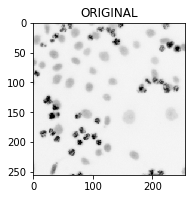

In [2]:
convert_images()

In [7]:
import functools
import argparse
import os
import itertools
from config import Configuration
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
from os import listdir
from os.path import isfile, join
import numpy as np
from random import shuffle

from train import input_fn, get_model_fn
import scipy.misc

tf.logging.set_verbosity(tf.logging.INFO)

In [8]:
import pandas as pd
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
def evaluate():
    """
    Begins evaluating the entire architecture.
    """
    # Session configuration.
    sess_config = tf.ConfigProto(
        allow_soft_placement=True,
        log_device_placement=False,
        intra_op_parallelism_threads=0,  # Autocompute how many threads to run
#         device_count={'GPU': 0},
        gpu_options=tf.GPUOptions(force_gpu_compatible=True))

    config = tf.contrib.learn.RunConfig(
        session_config=sess_config, model_dir=Configuration.MODEL_SAVE_DIR)

    eval_input_fn = functools.partial(
        input_fn,
        split_name='eval',
        is_training=False)

    classifier = tf.estimator.Estimator(
        model_fn=get_model_fn(),
        config=config)

    # .predict() returns an iterator of dicts;
    y = classifier.predict(input_fn=eval_input_fn)
    
    run_lengths = []
    image_ids = []
    
    for pred in y:
        image_id = pred['image_id'].decode("utf-8")
        input_image = load_image(join(Configuration.EVAL_IMAGES_DIR, "%s/images/%s.png" % (image_id, image_id)), None, cv2.IMREAD_COLOR)

        scaled_prediction = revertImageShape(pred['mask'], input_image)
        
        if image_id in image_ids:
            break
        
#         mask_shape = (input_image.shape[0],input_image.shape[1])
#         final_mask = np.zeros(mask_shape)
        
#         print("Final mask shape is %s, %s." % final_mask.shape)
#         for mask_id in listdir(join(Configuration.EVAL_IMAGES_DIR, "%s/masks" % image_id)):
            
#             mask_data = load_image(join(Configuration.EVAL_IMAGES_DIR, "%s/masks/%s" % (image_id, mask_id)), None, cv2.IMREAD_COLOR, convert_color=False)
#             mask_data = cv2.cvtColor(mask_data, cv2.COLOR_BGR2GRAY)
#             print("sub mask shape is %s, %s." % mask_data.shape)
            
#             final_mask = final_mask + np.where(mask_data > 0, mask_data, mask_data)
        
        plt.subplot(2, 3, 1)
        plt.imshow(pred['features'])
        plt.title("FEATURES")

        plt.subplot(2, 3, 2)
        plt.imshow(pred['mask'])
        plt.title("PREDICTION")

        plt.subplot(2, 3, 3)
        plt.imshow(pred['probabilities'])
        plt.title("PROBS")


        plt.subplot(2, 3, 4)
        plt.imshow(input_image)
        plt.title("ORIGINAL")
        
#         plt.subplot(2, 3, 5)
#         plt.imshow(final_mask)
#         plt.title("ORIGINAL MASK")
        
        plt.subplot(2, 3, 6)
        plt.imshow(scaled_prediction)
        plt.title("SCALED PREDICTION")

        plt.show()
        
        import pdb; pdb.set_trace()
        
        rle = [str(o) for o in rle_encoding(scaled_prediction)]
        run_length = " ".join(rle)
        
        run_lengths.append(run_length)
        image_ids.append(image_id)

        print("Done encoding %s" % image_id)
        
    
    return image_ids, run_lengths
#         predicted_class = labels_to_class_names[int(pred['classes'])]
#         food_dir = '../Validations/%s/%s' % (os.path.basename(
#             model_dir), predicted_class)

#         if not os.path.exists(food_dir):
#             os.makedirs(food_dir)

#         file_name = os.path.join(food_dir, '%s.png' % num_food_image.get(predicted_class, 1))

#         num_food_image[predicted_class] = num_food_image.get(predicted_class, 1) + 1

#         scipy.misc.imsave(file_name, pred['features'])

INFO:tensorflow:Using config: {'_environment': 'local', '_evaluation_master': '', '_tf_random_seed': None, '_task_id': 0, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_session_config': gpu_options {
  force_gpu_compatible: true
}
allow_soft_placement: true
, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_is_chief': True, '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbe185f99b0>, '_master': '', '_task_type': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': '../Models/unet_size256'}
Added net1 of shape: (8, 252, 252, 64)
Added net2 of shape: (8, 122, 122, 128)
Added net3 of shape: (8, 57, 57, 256)
Added net4 of shape: (8, 24, 24, 512)
Added net5 of shape: (8, 8, 8, 1024)
Added net9 of shape: (8, 68, 68, 64)
Added mask of shape: (8, 68, 68)
Added net1 of shape: (8

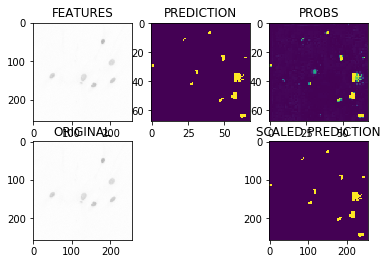

> <ipython-input-13-f73192d93f9e>(81)evaluate()
-> rle = [str(o) for o in rle_encoding(scaled_prediction)]
(Pdb) c
Done encoding 0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5
Loading image ../Dataset/stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/images/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732.png


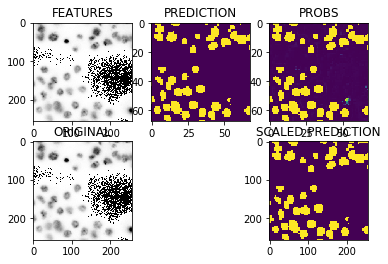

> <ipython-input-13-f73192d93f9e>(79)evaluate()
-> import pdb; pdb.set_trace()
(Pdb) c
Done encoding 0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732
Loading image ../Dataset/stage1_test/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6/images/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6.png


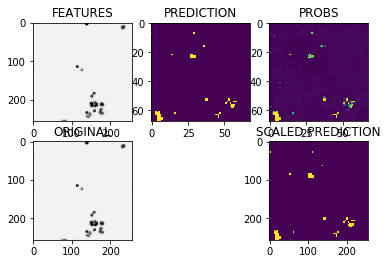

> <ipython-input-13-f73192d93f9e>(81)evaluate()
-> rle = [str(o) for o in rle_encoding(scaled_prediction)]
(Pdb) c
Done encoding 0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6
Loading image ../Dataset/stage1_test/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c/images/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c.png


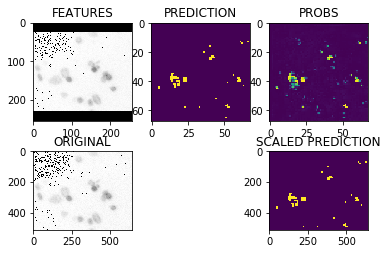

> <ipython-input-13-f73192d93f9e>(79)evaluate()
-> import pdb; pdb.set_trace()


In [ ]:
# A (supposed) 5% percent boost in certain GPUs by using faster convolution operations
os.environ['TF_SYNC_ON_FINISH'] = '0'
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

image_ids, run_lengths = evaluate()

In [11]:
df = pd.DataFrame({
        'ImageId': image_ids,
        'EncodedPixels': run_lengths
    }, columns = ['ImageId', 'EncodedPixels'])
    
df.to_csv('eval.csv', index=False)

In [12]:
df

,ImageId,EncodedPixels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,111 7 367 7 623 7 879 7 1135 7 1391 7 1647 7 1...
1,0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed3...,156 11 193 19 412 11 449 19 668 11 705 19 924 ...
2,0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa...,28 4 284 4 540 4 796 4 2283 4 2539 4 2795 4 30...
3,1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1...,24931 19 25443 19 25955 19 26467 19 26979 19 2...
4,1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c...,48967 10 48995 19 49479 10 49507 19 49991 10 5...
5,1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e...,8504 8 9023 8 9542 8 10061 8 10580 8 11099 8 1...
6,1d9eacb3161f1e2b45550389ecf7c535c7199c6b44b1c6...,40981 8 41505 8 42029 8 42553 8 43077 8 43601 ...
7,259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67...,493 10 1005 10 1517 10 2029 10 2541 10 3053 10...
8,0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...,314 23 406 15 833 23 925 15 1352 23 1444 15 18...
9,0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd4...,8084 12 8340 12 8596 12 8803 4 8852 12 9059 4 ...
